# Hyperparameters and Model Validation

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Validation curves in Scikit-Learn

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [4]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1)**2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

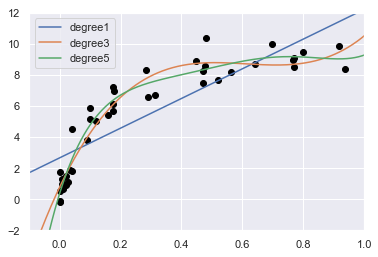

In [5]:
sns.set()
X_test = np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(X.ravel(),y,color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree{0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

Text(0, 0.5, 'score')

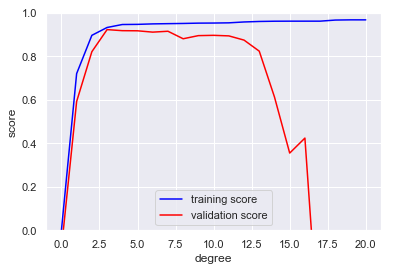

In [6]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree',degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue',label='training score')
plt.plot(degree, np.median(val_score, 1), color='red',label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

The training score is every where higher than the validation score; the training score is monotonically improving with increased model complexity; and the validation score reaches a maximum before dropping off as the model becomes overfit.

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

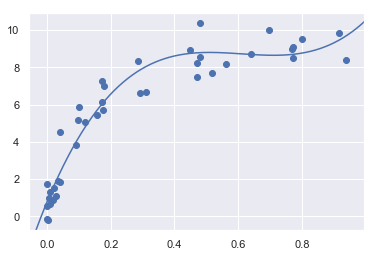

In [7]:
plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

## Learning Curves

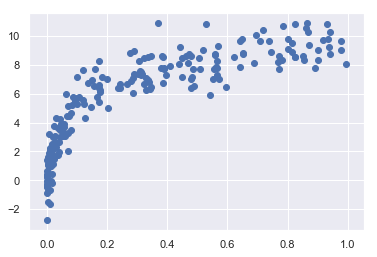

In [8]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(),y2)

Text(0, 0.5, 'score')

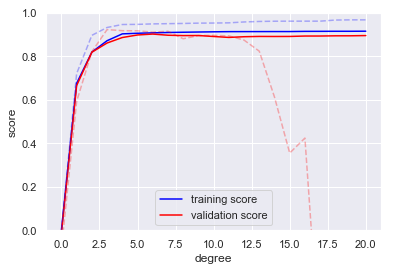

In [9]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree',degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red',label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

The solid lines show the new results, while the fainter dashed lines show the results of the previous smaller dataset.

## Learning curves in Scikit-learn

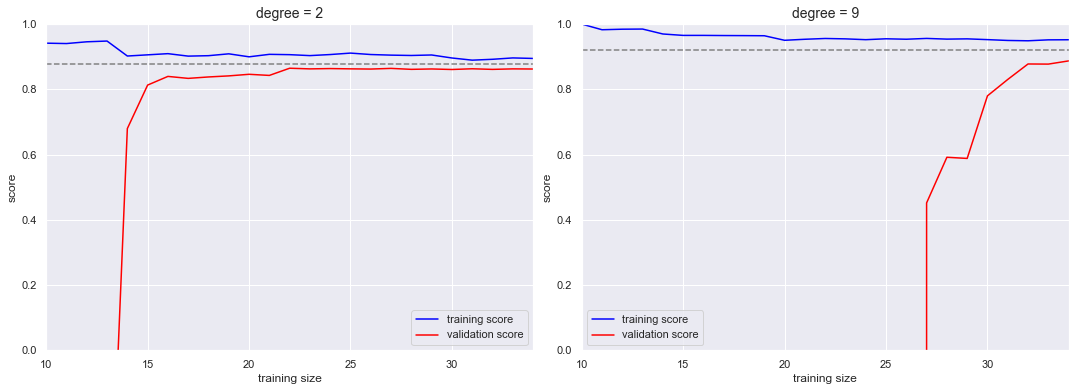

In [10]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95,wspace=0.1)
for i, degree in enumerate([2,9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1),color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

Plotting a learning curve can help make the decision of how to move forward in improving analysis.

## Validation in Practice: Grid Search

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree':np.arange(21),
              'linearregression__fit_intercept':[True, False],
              'linearregression__normalize':[True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [13]:
grid.fit(X, y)

C:\Users\david\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                        

In [14]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

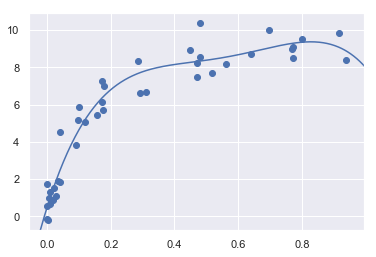

In [16]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)